# PNEUMONIA INTERPRETATION PROJECT

## Overview
Given imges of chest x-rays we will use Machine Learning techniques to determine if the patient has pneumonia

# Business Understanding

# Data Understanding

The images were provided in two sets, those that have pneumonia and those that do not. To create traning, test, and validation sets we randomly assigned images to each group. 80 wer pt in trainig group, 20% in testing group.  The validation group was composed fo 20% of the images taken from the complete set of images 

In [13]:
#import PIL
#import PIL.Image
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import numpy as np  
import os
import pathlib
import matplotlib.pyplot as plt


In [14]:
# Check GPU
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


2.17.0
Num GPUs Available:  1


In [38]:
# Resize the images in the given directory to a specified size.

val_dir = pathlib.Path("zippedData/pneumonia/val")
train_dir = pathlib.Path("zippedData/pneumonia/train")
test_dir = pathlib.Path("zippedData/pneumonia/test")

image_count = len(list(train_dir.glob('*/*.jpeg')))
print(image_count)

batch_size = 32
img_height = 224
img_width = 224

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size)


val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size)

4688
Found 4688 files belonging to 2 classes.
Found 1172 files belonging to 2 classes.
Found 1168 files belonging to 2 classes.


In [39]:
# Check image sizes
for image_batch, labels_batch in train_dataset:
    print(image_batch.shape)
    print(labels_batch.shape)
    break



(32, 224, 224, 3)
(32,)


In [40]:
 # Check image sizes
for image_batch, labels_batch in val_dataset:
    print(image_batch.shape)
    print(labels_batch.shape)
    break



(32, 224, 224, 3)
(32,)


In [41]:
# normalize the values to be between 0 and 1
normalization_layer = tf.keras.layers.Rescaling(1./255)

normalized_ds = train_dataset.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))


In [19]:
# Train the model

num_classes = 2

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)
])

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
hist = model.fit(
    normalized_ds,
    validation_data=val_dataset,
    epochs=12,
    verbose=1
)

Epoch 1/12
147/147 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - accuracy: 0.7211 - loss: 0.5955 - val_accuracy: 0.7295 - val_loss: 1.0339
Epoch 2/12
147/147 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.7327 - loss: 0.5918 - val_accuracy: 0.7295 - val_loss: 0.8354
Epoch 3/12
147/147 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.7329 - loss: 0.5845 - val_accuracy: 0.7295 - val_loss: 0.6856
Epoch 4/12
147/147 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.7322 - loss: 0.5820 - val_accuracy: 0.7295 - val_loss: 0.6839
Epoch 5/12
147/147 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.7291 - loss: 0.5889 - val_accuracy: 0.7295 - val_loss: 0.7266
Epoch 6/12
147/147 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.7360 - loss: 0.5804 - val_accuracy: 0.7295 - val_loss: 0.6777
Epoch 7/12
147/147 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.7334 - loss: 0.5833 - val_accuracy: 0.7295 - val_loss: 0.6399
Epoch 8/12
147/147 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.7335 - loss: 0.5841 - val_acc

In [22]:
hist_dict = hist.history
print(hist_dict.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


<Figure size 640x480 with 0 Axes>

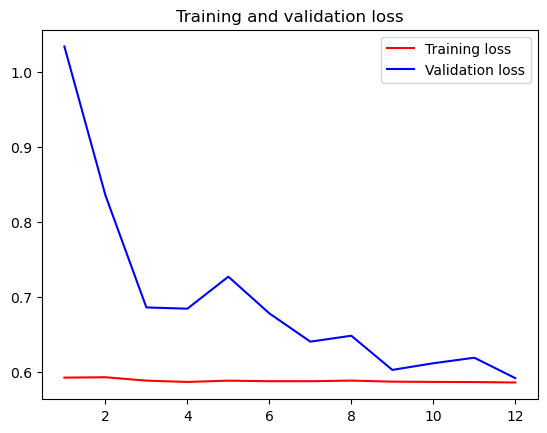

<Figure size 640x480 with 0 Axes>

In [23]:
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']
accuracy = hist_dict['accuracy']
val_accuracy = hist_dict['val_accuracy']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

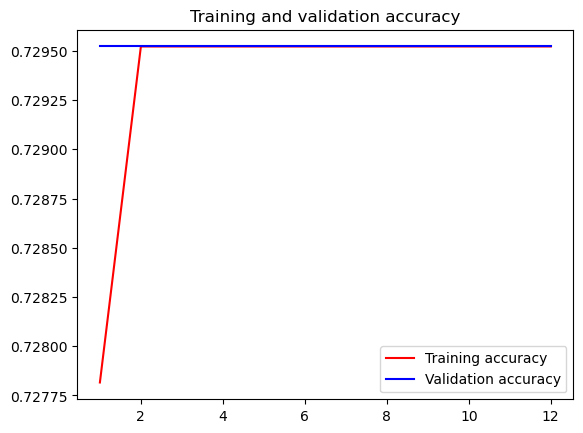

In [24]:
acc_val = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
plt.plot(epochs, acc_val, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()  

In [25]:
# Show the model resuts on testing set
    
loss, accuracy = model.evaluate(test_dataset)

37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.7181 - loss: 0.6038


# Try ConvNeXt  Model


In [42]:
xt = tf.keras.applications.ConvNeXtTiny(

    include_top=False,
    weights=None,   
    input_shape=(img_height, img_width, 3),
    classes=num_classes,
    classifier_activation='softmax' 
)


In [43]:
inputs = tf.keras.Input(shape=(img_height, img_width, 3))
x = tf.keras.layers.Rescaling(1./255)(inputs)
x= xt(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])


In [44]:
epochs_feature_extraction = 5
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)

print(f"\n--- Training for {epochs_feature_extraction} epochs (Feature Extraction Phase) ---")
history_feature_extraction = model.fit(train_dataset,
                                       epochs=epochs_feature_extraction,
                                       validation_data=val_dataset)


--- Training for 5 epochs (Feature Extraction Phase) ---
Epoch 1/5


2025-06-26 03:47:43.161624: W external/local_tsl/tsl/framework/bfc_allocator.cc:482] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.08GiB (rounded to 4379512064)requested by op 
2025-06-26 03:47:43.161696: I external/local_tsl/tsl/framework/bfc_allocator.cc:1039] BFCAllocator dump for GPU_0_bfc
2025-06-26 03:47:43.161704: I external/local_tsl/tsl/framework/bfc_allocator.cc:1046] Bin (256): 	Total Chunks: 5180, Chunks in use: 5180. 1.26MiB allocated for chunks. 1.26MiB in use in bin. 22.7KiB client-requested in use in bin.
2025-06-26 03:47:43.161709: I external/local_tsl/tsl/framework/bfc_allocator.cc:1046] Bin (512): 	Total Chunks: 85, Chunks in use: 85. 52.2KiB allocated for chunks. 52.2KiB in use in bin. 46.5KiB client-requested in use in bin.
2025-06-26 03:47:43.161714: I external/local_tsl/tsl/framework/bfc_allocator.cc:1046] Bin (1024): 	Total Chunks: 108, Chunks in use: 107. 158.5KiB allocated for chunks. 156.8KiB in use in bin. 156.3KiB client-requested in use in b

ResourceExhaustedError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "/home/todd/anaconda3/envs/tf_env/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/home/todd/anaconda3/envs/tf_env/lib/python3.10/runpy.py", line 86, in _run_code

  File "/home/todd/anaconda3/envs/tf_env/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/todd/anaconda3/envs/tf_env/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/todd/anaconda3/envs/tf_env/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/todd/anaconda3/envs/tf_env/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 199, in start

  File "/home/todd/anaconda3/envs/tf_env/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/home/todd/anaconda3/envs/tf_env/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/home/todd/anaconda3/envs/tf_env/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/home/todd/anaconda3/envs/tf_env/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/todd/anaconda3/envs/tf_env/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/todd/anaconda3/envs/tf_env/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/todd/anaconda3/envs/tf_env/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/todd/anaconda3/envs/tf_env/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/todd/anaconda3/envs/tf_env/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/todd/anaconda3/envs/tf_env/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/todd/anaconda3/envs/tf_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3077, in run_cell

  File "/home/todd/anaconda3/envs/tf_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3132, in _run_cell

  File "/home/todd/anaconda3/envs/tf_env/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/todd/anaconda3/envs/tf_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3336, in run_cell_async

  File "/home/todd/anaconda3/envs/tf_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3519, in run_ast_nodes

  File "/home/todd/anaconda3/envs/tf_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3579, in run_code

  File "/tmp/ipykernel_10429/1204994938.py", line 5, in <module>

  File "/home/todd/anaconda3/envs/tf_env/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/todd/anaconda3/envs/tf_env/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/home/todd/anaconda3/envs/tf_env/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

Out of memory while trying to allocate 4379511872 bytes.
	 [[{{node StatefulPartitionedCall}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_one_step_on_iterator_123274]

In [ ]:
4,379,511,872